In [ ]:
# imports
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import h5py
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
import math
import os
from PIL import Image
import pandas as pd
from collections import Counter
import random
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

Mounted at /content/drive


#### Paths

In [ ]:
!ls drive/MyDrive/keras_models/ferplus_models/model_9/ferplus_model_9_224_TL.keras

drive/MyDrive/keras_models/ferplus_models/model_9/ferplus_model_9_224_TL.keras


In [ ]:
#ferplus

ferplus_m9_path = 'drive/MyDrive/keras_models/ferplus_models/model_9/ferplus_model_9_224_TL.keras'

#ferplus_m11_96
ferplus_m11_96_path = 'drive/MyDrive/keras_models/ferplus_models/model_11_96/ferplus_model_11_96_FT.keras'

In [ ]:
# ferp
ferp_m1_path = 'drive/MyDrive/keras_models/ferp/model_1/ferp_model_1_FT.keras'
ferp_m1_history = 'drive/MyDrive/keras_models/ferp/model_1/tl_model_history.h5'

In [ ]:
!ls drive/MyDrive/keras_models/facerec-2/model_2/model_1_224_FT.keras

drive/MyDrive/keras_models/facerec-2/model_2/model_1_224_FT.keras


In [ ]:
!ls drive/MyDrive/keras_models/facerec-2/128_facerec_fer_1.keras

drive/MyDrive/keras_models/facerec-2/128_facerec_fer_1.keras


In [ ]:
# facerec-2

# m2
facerec_2_m2 = 'drive/MyDrive/keras_models/facerec-2/model_2/model_1_224_FT.keras'
facerec_2_m2_1st = 'drive/MyDrive/keras_models/facerec-2/model_2/model_2_224_FT_1st.keras'

#facerec_1_m1_128
facerec_1_m1_128 = 'drive/MyDrive/keras_models/facerec-2/128_facerec_fer_1.keras'

# m3 facerec 3
facerec_1_m3_224 = 'drive/MyDrive/keras_models/facerec-2/model_3/model_3_224_FT_1st.keras'

# m8 facerecV2
facerec_2_m8_224 = 'drive/MyDrive/keras_models/facerec-2/model_8/facerecV2_8.keras'
facerec_2_m8_224_history = 'drive/MyDrive/keras_models/facerec-2/model_8/ft_model_history.h5'

# m12 facerecV2

facerec_2_m12_224 = 'drive/MyDrive/keras_models/facerec-2/model_12/face_rec_e3_m12.keras'
facerec_2_m12_224_history = 'drive/MyDrive/keras_models/facerec-2/model_12/ft_model_history_e3.h5'


In [ ]:
#jayfer_m1
jayfer_model_1 = 'drive/MyDrive/keras_models/model_1_224_FT.keras'
jayfer_model_1_history = ''

#jayfer_m2
jayfer_model_2 = 'drive/MyDrive/keras_models/model_2/model_2_224_FT.keras'
jayfer_model_2_history = 'drive/MyDrive/keras_models/model_2/tl_model_history.h5'

#jayfer_m3
jayfer_model_3 = 'drive/MyDrive/keras_models/model_3/model_3_224_TL.keras'
jayfer_model_3_FT = 'drive/MyDrive/keras_models/model_3/model_3_224_TL.keras'
jayfer_model_3_history = 'drive/MyDrive/keras_models/model_3/tl_model_history.h5'

#jayfer_m4
jayfer_model_4 = 'drive/MyDrive/keras_models/model_4/model_4_224_TL.keras'
jayfer_model_4_FT = 'drive/MyDrive/keras_models/model_4/model_4_224_FT.keras'
jayfer_model_4_history = 'drive/MyDrive/keras_models/model_4/tl_model_history.h5'

# jayfer_m5
jayfer_model_5 = 'drive/MyDrive/keras_models/model_5/model_5_224_FT.keras'
jayfer_model_5_b = 'drive/MyDrive/keras_models/model_5/model_5_224_FT_b.keras'
jayfer_model_5_c = 'drive/MyDrive/keras_models/model_5/model_5_224_FT_c.keras'

# jayfer_m6
jayfer_model_6 = 'drive/MyDrive/keras_models/model_6/model_6_224_FT.keras'
jayfer_model_6_c = 'drive/MyDrive/keras_models/model_6/model_6_224_FT_c.keras'

# jayfer_m7
jayfer_model_7_b = 'drive/MyDrive/keras_models/model_7/model_7_224_FT_b.keras'
jayfer_model_7_TL_b = 'drive/MyDrive/keras_models/model_7/model_7_224_TL_b.keras'

# model 8
jayfer_model_8 = 'drive/MyDrive/keras_models/model_8/model_8_224_TL.keras'


# ------------------------------ History for Loss and Accuracy ---------------------------------- #
history = facerec_2_m12_224_history

#### Load model

In [ ]:
print('load model')
model = tf.keras.models.load_model(facerec_2_m12_224)
model.summary()

load model


Model: "finetune_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ universal_input (InputLayer)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_3 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_3 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ base_model (Functional)         │ (None, 14, 14, 512)    │       821,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_extraction (Sequential)   │ (None, 2, 2, 256)      │       272,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 2, 2, 256)      │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gap (GlobalAveragePooling2D)    │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pre_classification (Sequential) │ (None, 32)             │         8,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification_head (Dense)     │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,223 (12.37 MB)

 Trainable params: 1,070,279 (4.08 MB)

 Non-trainable params: 32,384 (126.50 KB)

 Optimizer params: 2,140,560 (8.17 MB)

In [ ]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
tflite_model_path = "model_facerec_m12.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved as {tflite_model_path}")

Saved artifact at '/tmp/tmp_qctou38'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='universal_input')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  132585017543376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017546064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017545872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017545104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017543760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017546832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017547984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017548368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017548176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132585017546640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13258501754

### Datasets

Model based on FER+, First Workspace, Face-rec2 training data.

To test:
- TFEID (Taiwanese Facial Expression Image Database)
- Face-rec2
- First Workspace
- FER+

#### Loading Data

##### TFEID

In [ ]:
TFEID_path = 'drive/MyDrive/Experiment_With_Code/AI/datasets/TFEID.zip'
!unzip $TFEID_path

Archive:  drive/MyDrive/Experiment_With_Code/AI/datasets/TFEID.zip
   creating: TFEID/
  inflating: __MACOSX/._TFEID        
   creating: TFEID/dfh_surprise_x/
  inflating: __MACOSX/TFEID/._dfh_surprise_x  
   creating: TFEID/dfh_disguest_x/
  inflating: __MACOSX/TFEID/._dfh_disguest_x  
  inflating: TFEID/.DS_Store         
  inflating: __MACOSX/TFEID/._.DS_Store  
   creating: TFEID/dfh_anger_x/
  inflating: __MACOSX/TFEID/._dfh_anger_x  
   creating: TFEID/dfh_fear_x/
  inflating: __MACOSX/TFEID/._dfh_fear_x  
   creating: TFEID/dfh_neutral_x/
  inflating: __MACOSX/TFEID/._dfh_neutral_x  
   creating: TFEID/dfh_sadness_x/
  inflating: __MACOSX/TFEID/._dfh_sadness_x  
   creating: TFEID/dfh_happiness_x/
  inflating: __MACOSX/TFEID/._dfh_happiness_x  
  inflating: TFEID/dfh_surprise_x/m13_dfh_px.JPG  
  inflating: __MACOSX/TFEID/dfh_surprise_x/._m13_dfh_px.JPG  
  inflating: TFEID/dfh_surprise_x/m02_dfh_px.JPG  
  inflating: __MACOSX/TFEID/dfh_surprise_x/._m02_dfh_px.JPG  
  inflating

In [ ]:
testing_dataset_name = 'TFEID'

# store each file into X and y data
FER_EMOTION_LABELS = {
    'dfh_anger_x': 0,
    'dfh_disguest_x': 1,
    'dfh_fear_x': 2,
    'dfh_happiness_x': 3,
    'dfh_neutral_x': 4,
    'dfh_sadness_x': 5,
    'dfh_surprise_x': 6
}

# Function to load and preprocess images from folder
def load_images_from_folder(base_path, _resize = 224, _restrict = 50):
    images = []
    labels = []

    for emotion, label in FER_EMOTION_LABELS.items():
        folder_path = os.path.join(base_path, emotion)

        if not os.path.exists(folder_path):
            print(f"Warning: Folder '{folder_path}' does not exist.")
            continue

        emotion_images = sorted(os.listdir(folder_path))

        idx = 0
        for img_name in emotion_images:

            if idx > _restrict:
                idx = 0
                break
            idx += 1
            img_path = os.path.join(folder_path, img_name)

            # Open image, convert to grayscale, resize to 224x224, and convert to RGB
            img = Image.open(img_path)

            img = img.resize((_resize, _resize))  # Resize to 224x224
            img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)  # Convert to RGB
            img = np.stack([img] * 3, axis=-1)  # Expand grayscale image to 3 channels


            img_array = np.array(img)  # Convert to numpy array
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
emotion_test_path = 'TFEID/'
X_test, y_test = load_images_from_folder(emotion_test_path)
print(f"test done, shape: {X_test.shape}") # First 100 images per label


test done, shape: (268, 224, 224, 3)


##### KDEF - side profiles can be ignored

In [ ]:
!rm -r surprise

In [ ]:
# import
!mkdir kdef
!unzip -q drive/MyDrive/Experiment_With_Code/AI/datasets/KDEF/KDEF.zip -d kdef

In [ ]:
# load
testing_dataset_name = 'KDEF'

EMOTION_LABELS = {
    "angry": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

# Define proportion per emotion
limiter = 50
PROPORTION_DICT = {
    "angry": limiter,
    "disgust": limiter,
    "fear": limiter,
    "happy": limiter,
    "neutral": limiter,
    "sad": limiter,
    "surprise": limiter
}

def load_images_from_folder(base_path, emotion_labels=EMOTION_LABELS, proportion_dict=PROPORTION_DICT):
    images = []
    labels = []

    for emotion, label in emotion_labels.items():
        folder_path = os.path.join(base_path, emotion)

        if not os.path.exists(folder_path):
            print(f"Warning: Folder '{folder_path}' does not exist.")
            continue

        emotion_images = sorted(os.listdir(folder_path))
        total_images = len(emotion_images)
        needed_images = proportion_dict.get(emotion, total_images)  # Default: all images

        # Print number of images in the current folder
        print(f"Folder '{emotion}' contains {total_images} images. Using {needed_images}.")

        # Randomly select images if more exist than needed
        if total_images > needed_images:
            emotion_images = random.sample(emotion_images, needed_images)

        for img_name in emotion_images:
            img_path = os.path.join(folder_path, img_name)

            # Open image, resize to 224x224, convert to RGB
            img = Image.open(img_path).resize((224, 224))
            img = cv.cvtColor(np.array(img), cv.COLOR_BGR2RGB)  # Ensure RGB format

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
emotion_test_path = 'kdef'

X_test, y_test = load_images_from_folder(emotion_test_path)
print("test done") # First 100 images per label

# shuffle
def stratified_k_fold(X_train, y_train, n_splits=10):
    # Shuffle X_train and y_train together, maintaining their pairing
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=40)

    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits)

    # List to store splits
    splits = []

    # Iterate over the splits
    for train_idx, val_idx in skf.split(X_train_shuffled, y_train_shuffled):
        # Split the data based on indices
        X_train_fold, y_train_fold = X_train_shuffled[train_idx], y_train_shuffled[train_idx]

        # Append the split to the list
        splits.append((X_train_fold, y_train_fold))

    # Return shuffled training data and the list of cross-validation splits
    return X_train_shuffled, y_train_shuffled, splits


# shuffle once more
print('shuffled')
X_test, y_test, train_splits = stratified_k_fold(X_test, y_test)

print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Folder 'angry' contains 420 images. Using 50.
Folder 'disgust' contains 420 images. Using 50.
Folder 'fear' contains 420 images. Using 50.
Folder 'happy' contains 420 images. Using 50.
Folder 'neutral' contains 420 images. Using 50.
Folder 'sad' contains 419 images. Using 50.
Folder 'surprise' contains 419 images. Using 50.
test done
shuffled
x_test shape: (350, 224, 224, 3)
y_test shape: (350,)


#### FaceRec2

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9ha1uAtSl9MeUw8Nd8hk")
project = rf.workspace("project-1-7fc2a").project("face-recognition-uy5cg")
version = project.version(2)
dataset = version.download("folder")

print("Public URL:", rf.workspace)

# website

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to face-recognition-2 in folder:: 100%|██████████| 9885/9885 [00:02<00:00, 4314.00it/s]


Public URL: <bound method Roboflow.workspace of <roboflow.Roboflow object at 0x7c4854361950>>


In [ ]:
testing_dataset_name = 'face-rec2'
facerec_path = 'drive/MyDrive/Experiment_With_Code/AI/datasets/face-rec2/facerec_test_and_val.h5'

with h5py.File(facerec_path, 'r') as f:
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')

# shuffle

def stratified_k_fold(X_train, y_train, n_splits=5):
    # Shuffle X_train and y_train together, maintaining their pairing
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=40)

    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits)

    # List to store splits
    splits = []

    # Iterate over the splits
    for train_idx, val_idx in skf.split(X_train_shuffled, y_train_shuffled):
        # Split the data based on indices
        X_train_fold, y_train_fold = X_train_shuffled[train_idx], y_train_shuffled[train_idx]

        # Append the split to the list
        splits.append((X_train_fold, y_train_fold))

    # Return shuffled training data and the list of cross-validation splits
    return X_train_shuffled, y_train_shuffled, splits



def resizeData(x, target_size=(224, 224), batch_size=64, padding_color=0):
    num_samples = x.shape[0]
    resized_x = []

    for i in range(0, num_samples, batch_size):
        batch = x[i:i+batch_size]  # Take a batch
        batch_resized = []

        for img in batch:
            img = tf.convert_to_tensor(img, dtype=tf.float32)

            # Get original dimensions
            h, w = tf.shape(img)[0], tf.shape(img)[1]

            # Compute scaling factor to fit within target_size
            scale = tf.minimum(target_size[0] / tf.cast(w, tf.float32), target_size[1] / tf.cast(h, tf.float32))
            new_w, new_h = tf.cast(w, tf.float32) * scale, tf.cast(h, tf.float32) * scale
            new_w, new_h = tf.cast(new_w, tf.int32), tf.cast(new_h, tf.int32)

            # Resize image while keeping aspect ratio
            resized = tf.image.resize(img, (new_h, new_w), method=tf.image.ResizeMethod.BILINEAR)

            # Compute padding amounts
            pad_top = (target_size[1] - new_h) // 2
            pad_bottom = target_size[1] - new_h - pad_top
            pad_left = (target_size[0] - new_w) // 2
            pad_right = target_size[0] - new_w - pad_left

            # Apply padding
            padded = tf.pad(resized, [[pad_top, pad_bottom], [pad_left, pad_right], [0, 0]],
                            constant_values=padding_color)

            batch_resized.append(padded)

        resized_x.append(tf.stack(batch_resized))  # Stack images in batch

    return np.vstack([batch.numpy() for batch in resized_x])  # Convert Tensor to NumPy
# shuffle once more
X_test, y_test, train_splits = stratified_k_fold(X_test, y_test)
X_test = resizeData(X_test, batch_size=256)
print(f'shape of X_test: {X_test.shape}')
print(f'shape of y_test: {y_test.shape}')

shape of X_test: (910, 224, 224, 3)
shape of y_test: (910,)
shape of X_test: (910, 224, 224, 3)
shape of y_test: (910,)


In [ ]:
testing_dataset_name = 'face-rec2'

EMOTION_LABELS = {
    "anger": 0,
    "disgust": 1,
    "fear": 2,
    "happy": 3,
    "neutral": 4,
    "sad": 5,
    "surprise": 6
}

limiter = 1000
# Define proportion per emotion
PROPORTION_DICT = {
    "anger": limiter,
    "disgust": limiter,
    "fear": limiter,
    "happy": limiter,
    "neutral": limiter,
    "sad": limiter,
    "surprise": limiter
}

def load_images_from_folder(base_path, emotion_labels=EMOTION_LABELS, proportion_dict=PROPORTION_DICT):
    images = []
    labels = []

    for emotion, label in emotion_labels.items():
        folder_path = os.path.join(base_path, emotion)

        if not os.path.exists(folder_path):
            print(f"Warning: Folder '{folder_path}' does not exist.")
            continue

        emotion_images = sorted(os.listdir(folder_path))
        total_images = len(emotion_images)
        needed_images = proportion_dict.get(emotion, total_images)  # Default: all images

        # Print number of images in the current folder
        print(f"Folder '{emotion}' contains {total_images} images. Using {needed_images}.")

        # Randomly select images if more exist than needed
        if total_images > needed_images:
            emotion_images = random.sample(emotion_images, needed_images)

        for img_name in emotion_images:
            img_path = os.path.join(folder_path, img_name)

            # Open image, resize to 224x224, convert to RGB
            img = Image.open(img_path).resize((224, 224))
            img = cv.cvtColor(np.array(img), cv.COLOR_BGR2RGB)  # Ensure RGB format

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
emotion_test_path = 'face-recognition-2/train'

X_test, y_test = load_images_from_folder(emotion_test_path)
print("test done") # First 100 images per label

# shuffle
# def stratified_k_fold(X_train, y_train, n_splits=10):
#     # Shuffle X_train and y_train together, maintaining their pairing
#     X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=40)

#     # Initialize StratifiedKFold
#     skf = StratifiedKFold(n_splits=n_splits)

#     # List to store splits
#     splits = []

#     # Iterate over the splits
#     for train_idx, val_idx in skf.split(X_train_shuffled, y_train_shuffled):
#         # Split the data based on indices
#         X_train_fold, y_train_fold = X_train_shuffled[train_idx], y_train_shuffled[train_idx]

#         # Append the split to the list
#         splits.append((X_train_fold, y_train_fold))

#     # Return shuffled training data and the list of cross-validation splits
#     return X_train_shuffled, y_train_shuffled, splits


# # shuffle once more
# print('shuffled')
# X_test, y_test, train_splits = stratified_k_fold(X_test, y_test)

print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Folder 'anger' contains 766 images. Using 1000.
Folder 'disgust' contains 620 images. Using 1000.
Folder 'fear' contains 757 images. Using 1000.
Folder 'happy' contains 1187 images. Using 1000.
Folder 'neutral' contains 1255 images. Using 1000.
Folder 'sad' contains 706 images. Using 1000.
Folder 'surprise' contains 923 images. Using 1000.
test done
x_test shape: (5772, 224, 224, 3)
y_test shape: (5772,)


##### First Workspace, ignore?

In [ ]:
!mkdir FirstWorkspace
!unzip -q drive/MyDrive/Experiment_With_Code/AI/datasets/firstworkspace_emotion/FacialEmotionDetection.v1i.multiclass.zip -d FirstWorkspace

In [ ]:
testing_dataset_name = 'First Workspace'

def load_images_and_labels(image_folder, csv_file, image_size=(224, 224)):

    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Extract the column names (i.e., class names) for one-hot encoding
    class_columns = df.columns[1:]  # Skip the 'filename' column

    x_train = []
    y_train = []

    for index, row in df.iterrows():
        # Get the image filename and one-hot encoded labels
        image_filename = row['filename']
        labels = row[class_columns].values.astype(np.float32)

        if np.array_equal(labels, np.array([1., 0., 0., 0., 0., 0., 0.])):
          continue


        # Skip images where all remaining labels are zero (meaning they were ignored)
        if labels.sum() == 0:
            continue

        # Construct full image path
        image_path = os.path.join(image_folder, image_filename)

        # Load and resize the image
        image = cv.imread(image_path)
        if image is None:
            continue  # Skip if the image couldn't be loaded
        image = cv.resize(image, image_size)

        # Append the image and one-hot encoded labels to the lists
        x_train.append(image)
        y_train.append(labels)

    # Convert lists to numpy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)

    return x_train, y_train

# Example usage:
csv_file = 'FirstWorkspace/test/_classes.csv'
image_folder = 'FirstWorkspace/test'

X_test, y_test = load_images_and_labels(image_folder, csv_file)

# Convert one-hot encoded labels to class indices
y_test = np.argmax(y_test, axis=1)

# Print shapes to verify
print("x_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


x_test shape: (76, 224, 224, 3)
y_test shape: (76,)


#### FER+

In [ ]:
!mkdir jayfer
!unzip -q drive/MyDrive/Experiment_With_Code/AI/datasets/jayfer_test/jayfer_test.zip -d jayfer

In [ ]:
testing_dataset_name = 'FER+'

EMOTION_LABELS = {
    "anger": 0,
    "disgust": 1,
    "fear": 2,
    "happiness": 3,
    "neutral": 4,
    "sadness": 5,
    "surprise": 6
}

# Define proportion per emotion
limiter = 50
PROPORTION_DICT = {
    "anger": limiter,
    "disgust": limiter,
    "fear": limiter,
    "happiness": limiter,
    "neutral": limiter,
    "sadness": limiter,
    "surprise": limiter
}

def load_images_from_folder(base_path, emotion_labels=EMOTION_LABELS, proportion_dict=PROPORTION_DICT):
    images = []
    labels = []

    for emotion, label in emotion_labels.items():
        folder_path = os.path.join(base_path, emotion)

        if not os.path.exists(folder_path):
            print(f"Warning: Folder '{folder_path}' does not exist.")
            continue

        emotion_images = sorted(os.listdir(folder_path))
        total_images = len(emotion_images)
        needed_images = proportion_dict.get(emotion, total_images)  # Default: all images

        # Print number of images in the current folder
        print(f"Folder '{emotion}' contains {total_images} images. Using {needed_images}.")

        # Randomly select images if more exist than needed
        if total_images > needed_images:
            emotion_images = random.sample(emotion_images, needed_images)

        for img_name in emotion_images:
            img_path = os.path.join(folder_path, img_name)

            # Open image, resize to 224x224, convert to RGB
            img = Image.open(img_path).resize((224, 224))
            img = cv.cvtColor(np.array(img), cv.COLOR_BGR2RGB)  # Ensure RGB format

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
emotion_test_path = 'jayfer/test'

X_test, y_test = load_images_from_folder(emotion_test_path)
print("test done") # First 100 images per label

# -------------------- shuffle --------------------
def stratified_k_fold(X_train, y_train, n_splits=10):
    # Shuffle X_train and y_train together, maintaining their pairing
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=40)

    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits)

    # List to store splits
    splits = []

    # Iterate over the splits
    for train_idx, val_idx in skf.split(X_train_shuffled, y_train_shuffled):
        # Split the data based on indices
        X_train_fold, y_train_fold = X_train_shuffled[train_idx], y_train_shuffled[train_idx]

        # Append the split to the list
        splits.append((X_train_fold, y_train_fold))

    # Return shuffled training data and the list of cross-validation splits
    return X_train_shuffled, y_train_shuffled, splits


# shuffle once more
print('shuffled')
X_test, y_test, train_splits = stratified_k_fold(X_test, y_test)

print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Folder 'anger' contains 904 images. Using 50.
Folder 'disgust' contains 352 images. Using 50.
Folder 'fear' contains 601 images. Using 50.
Folder 'happiness' contains 900 images. Using 50.
Folder 'neutral' contains 900 images. Using 50.
Folder 'sadness' contains 906 images. Using 50.
Folder 'surprise' contains 900 images. Using 50.
test done
shuffled
x_test shape: (350, 224, 224, 3)
y_test shape: (350,)


#### Ferp

In [ ]:
test_path = 'drive/MyDrive/Experiment_With_Code/AI/datasets/ferp/ferp.h5'
testing_dataset_name = 'ferp'

with h5py.File(test_path, 'r') as f:
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]

def stratified_k_fold(X_train, y_train, n_splits=10):
    # Shuffle X_train and y_train together, maintaining their pairing
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=40)

    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits)

    # List to store splits
    splits = []

    # Iterate over the splits
    for train_idx, val_idx in skf.split(X_train_shuffled, y_train_shuffled):
        # Split the data based on indices
        X_train_fold, y_train_fold = X_train_shuffled[train_idx], y_train_shuffled[train_idx]

        # Append the split to the list
        splits.append((X_train_fold, y_train_fold))

    # Return shuffled training data and the list of cross-validation splits
    return X_train_shuffled, y_train_shuffled, splits


# shuffle once more
print('shuffled')
X_test, y_test, train_splits = stratified_k_fold(X_test, y_test)

print(f'shape {X_test.shape} y shape: {y_test.shape}')

# resize

IMG_SIZE = 224

# reduce
limiter = 1000
X_test = X_test[:limiter]
y_test = y_test[:limiter]

print(f'shape {X_test.shape} y shape: {y_test.shape}')

def resizeData(x, target_size=(IMG_SIZE, IMG_SIZE), batch_size=64):
    num_samples = x.shape[0]
    resized_x = []

    for i in range(0, num_samples, batch_size):
        batch = x[i:i+batch_size]  # Take a batch
        batch_resized = tf.image.resize(batch, target_size, method=tf.image.ResizeMethod.BILINEAR)
        resized_x.append(batch_resized.numpy())  # Convert Tensor to NumPy

    return np.vstack(resized_x)  # Stack batches back together

X_test = resizeData(X_test)
print(f'shape {X_test.shape} y shape: {y_test.shape}')


shuffled
shape (7048, 48, 48, 3) y shape: (7048,)
shape (1000, 48, 48, 3) y shape: (1000,)
shape (1000, 224, 224, 3) y shape: (1000,)


#### Helper Functions to View Dataset before Prediction

Fitting 15 images
Shape of X: (850, 224, 224, 3)
Shape of y: (850,)


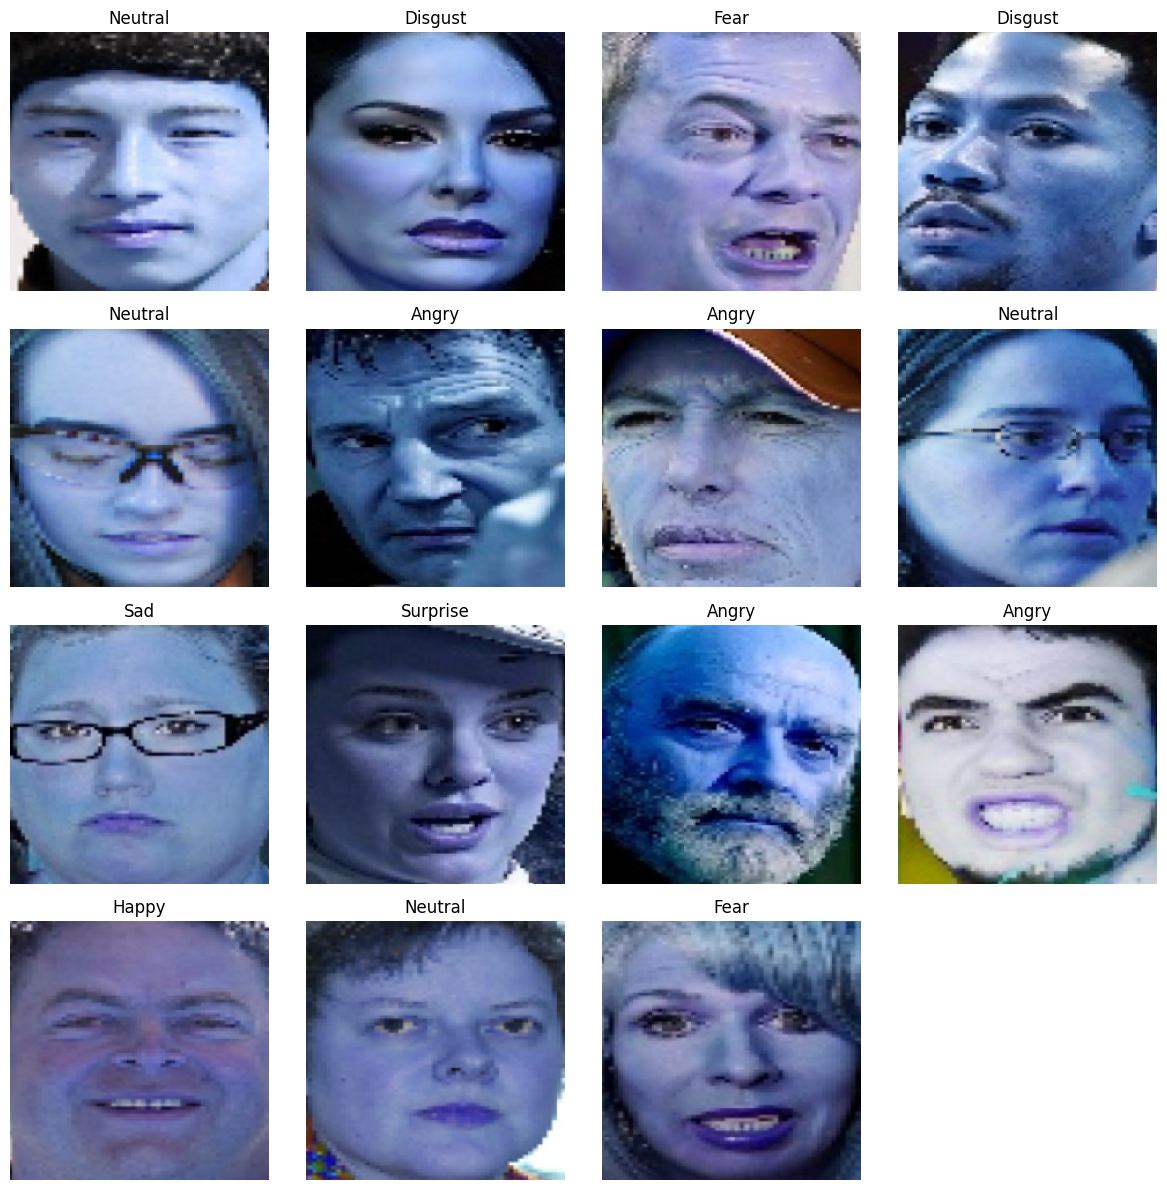

In [ ]:
# Visualise
fer_emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
ck_emotions = ["Angry", "Contempt", "disgust", "fear", "happy", "Sad", "Surprise"]

def visualize_data(X, y, amount=12, class_names=fer_emotions):
    # Check the number of images in the dataset
    limit = len(X)
    if amount > limit:
        print(f"Requested amount exceeds dataset size. Displaying {limit} images.")
        amount = limit
    print(f"Fitting {amount} images")

    print(f"Shape of X: {X.shape}")  # Check the shape of the image array
    print(f"Shape of y: {y.shape}")  # Check the shape of the label array

    if X.shape[0] == 0 or y.shape[0] == 0:
        print("Warning: One of the arrays is empty!")

    # Calculate rows and columns dynamically
    col = math.ceil(math.sqrt(amount))  # Number of columns
    row = math.ceil(amount / col)       # Number of rows

    # Create a grid plot with dynamic figure size
    plt.figure(figsize=(col * 3, row * 3))  # Scale figure size by grid dimensions

    for i in range(amount):
        img = X[i] / 255.0  # Normalize image
        label = y[i]  # One-hot encoded label
        ax = plt.subplot(row, col, i + 1)

        # Display the image
        if isinstance(img, np.ndarray) and img.size > 0:  # Check if img is a valid array
            plt.imshow(img[:, :, ::-1])  # Convert BGR (OpenCV) to RGB
            plt.title(class_names[(label)])  # ✅ Convert one-hot vector to class index
        else:
            plt.title("Image Missing")

        plt.axis("off")

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Load data and label from train_dataset
visualize_data(X_test[60:], y_test[60:], amount=15)
# preserve ratio use yunet


<ipython-input-9-d196f3862cf6>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45)


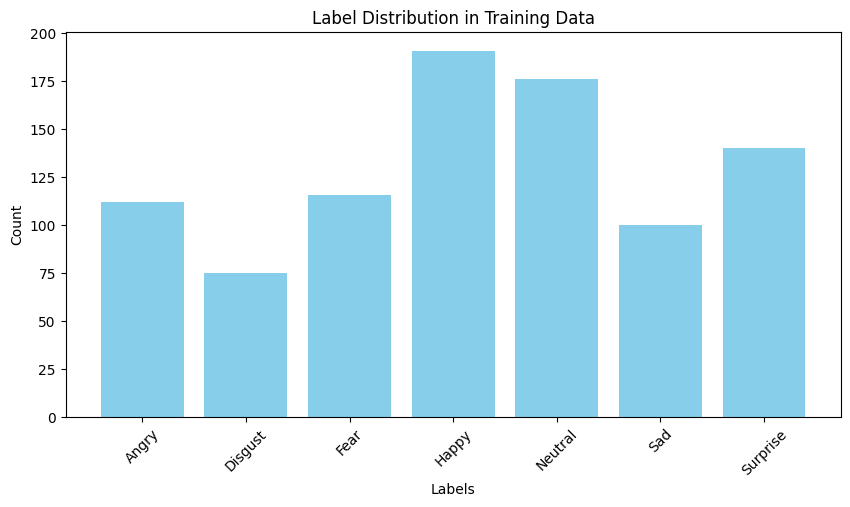

In [ ]:
def plotLabelBar(y_test, labels):
    #y_train = np.argmax(y_train, axis=1)  # Convert one-hot encoding to label indices
    label_counts = Counter(y_test)  # Count occurrences of each label

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.bar(labels, [label_counts[i] for i in range(len(labels))], color='skyblue')
    ax.set_xlabel("Labels")
    ax.set_ylabel("Count")
    ax.set_title("Label Distribution in Training Data")
    ax.set_xticklabels(labels, rotation=45)

    plt.show()

plotLabelBar(y_test, ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"])


### Prediction

#### Predictions with Tflite

In [ ]:
def show_multiple_tflite_predictions(interpreter, input_details, output_details, input_emotions, x_train, y_train, plotLabelBar=True):
    num_images = len(x_train)
    y_pred = []  # Store predicted labels
    emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

    if plotLabelBar:
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(num_images, 2, figsize=(6, 3 * num_images))
        if num_images == 1:
            axes = [axes]  # Ensure axes is iterable for a single image

    for idx in range(num_images):
        input_data = np.expand_dims(x_train[idx], axis=0).astype(np.float32)  # Ensure batch dimension
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()  # Run inference
        output_data = interpreter.get_tensor(output_details[0]['index'])
        output_data = np.squeeze(output_data)  # Flatten the output
        predicted_index = np.argmax(output_data)
        y_pred.append(predicted_index)

        # Create a dictionary of emotions and their corresponding confidence scores
        predictions = {emotions[i]: output_data[i] for i in range(len(emotions))}
        sorted_predictions = dict(sorted(predictions.items(), key=lambda item: item[1], reverse=True))

        if plotLabelBar:
            # Display the original image -> / 255.0
            axes[idx][0].imshow(x_train[idx] / 255.0, cmap='gray')
            axes[idx][0].axis("off")
            axes[idx][0].set_title(f'Original label: {input_emotions[y_train[idx]]}')  # Convert y_train index to label

            # Display the predictions as a bar chart
            axes[idx][1].bar(sorted_predictions.keys(), sorted_predictions.values(), color='skyblue')
            axes[idx][1].set_xlabel("Emotions")
            axes[idx][1].set_ylabel("Confidence Score")
            axes[idx][1].set_title("TFLite Model Predictions")
            axes[idx][1].set_ylim(0, 1)
            axes[idx][1].tick_params(axis='x', rotation=45)

    if plotLabelBar:
        plt.tight_layout()
        plt.show()

    return np.array(y_pred)  # Return array of predicted labels

In [ ]:
fer_emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
print(f'predicting on {tflite_model_path}')
print(f'dataset => {testing_dataset_name}')

# tflite_model_path
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input/output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# amount to predict
pred_limit = 1000

y_pred = show_multiple_tflite_predictions(interpreter, input_details, output_details, fer_emotions, X_test[:pred_limit], y_test[:pred_limit], False) # was X_train, y_train

predicting on model_facerec_m12.tflite
dataset => face-rec2


#### Confusion Matrix and Test Accuracy Rating

Unique values in y_test: [0 1 2 3 4 5 6]
Unique values in y_pred: [0 1 2 3 4 5 6]
^ If these don't match, then this won't work ^
Train shape (910,)
Pred shape (910,)


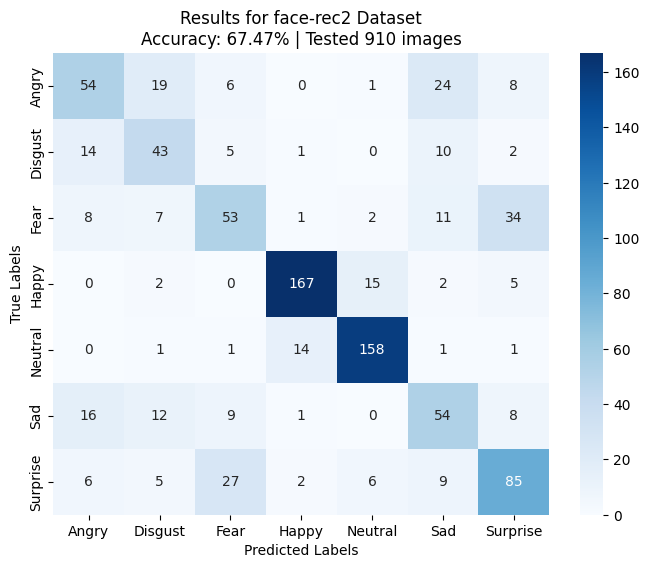

In [ ]:
classes = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]  # fer

# Confusion matrix
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))
print("^ If these don't match, then this won't work ^")

labels = np.unique(y_test)

print(f"Train shape {y_test.shape}")
print(f"Pred shape {y_pred.shape}")

# Compute confusion matrix
cm = confusion_matrix(y_test[:pred_limit], y_pred, labels=labels)

# Compute accuracy
accuracy = accuracy_score(y_test[:pred_limit], y_pred) * 100
# print(f"Prediction Accuracy: {accuracy:.4f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=classes, yticklabels=classes
)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Results for {testing_dataset_name} Dataset\nAccuracy: {accuracy:.2f}% | Tested {len(y_test[:pred_limit])} images")
plt.show()

# m8 is the first model to get 50-55 percentage accuracy in all 3 datasets


In [ ]:
# Tensorflow official
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'For Dataset: {testing_dataset_name}')
print(f"Test accuracy: {test_acc} for {len(y_test)} images")
print(f"Test loss: {test_loss}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6614 - loss: 0.8654
For Dataset: face-rec2
Test accuracy: 0.6747252941131592 for 910 images
Test loss: 0.834457278251648


#### Plot Loss and Accuracy of Model

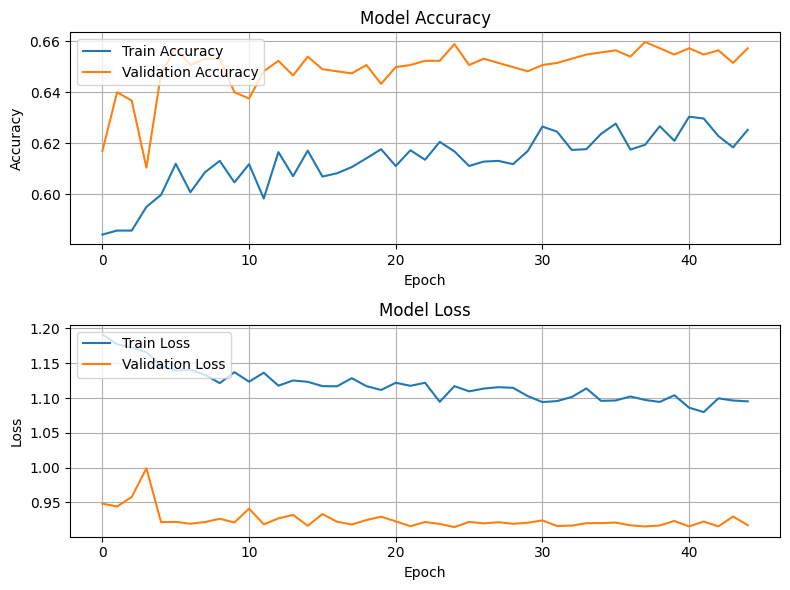

In [ ]:
with h5py.File(history, 'r') as f:
    acc = f['accuracy'][:]
    val_acc = f['val_accuracy'][:]
    loss = f['loss'][:]
    val_loss = f['val_loss'][:]

def plotHistory(acc, val_acc, loss, val_loss):
    fig, axs = plt.subplots(2, 1, figsize=(8, 6))  # Two subplots

    # Plot accuracy
    axs[0].plot(acc, label='Train Accuracy')
    axs[0].plot(val_acc, label='Validation Accuracy')
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(loc='upper left')
    axs[0].grid()

    # Plot loss
    axs[1].plot(loss, label='Train Loss')
    axs[1].plot(val_loss, label='Validation Loss')
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(loc='upper left')
    axs[1].grid()

    plt.tight_layout()  # Prevent overlap
    plt.show()


plotHistory(acc, val_acc, loss, val_loss);